## JOB-A-THON

The main aim of this project is to predict  if the user would buy the product in the next 3 months or not based on various features which we will discuss as we go ahead.


## Tasks in this Project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.formula.api as smf
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
df1=pd.read_csv('train.csv')

## print shape of dataset with rows and columns
print(df1.shape)

(39161, 19)


In [3]:
df2=pd.read_csv('test.csv')

## print shape of dataset with rows and columns
print(df2.shape)

(13184, 18)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [6]:
df=df1.append(df2)#combining both train and test data

In [7]:
df["products_purchased"].value_counts()

2.0    11351
3.0     6284
1.0     4749
4.0      914
Name: products_purchased, dtype: int64

<AxesSubplot:xlabel='campaign_var_1'>

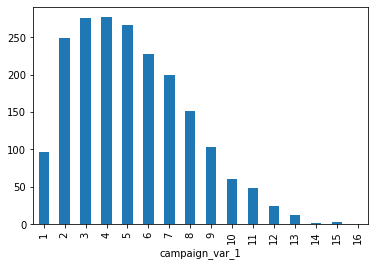

In [8]:
df.groupby(df["campaign_var_1"])['buy'].sum().plot.bar()

In [9]:
dict1={2:1,3:1,4:1,5:1,6:1,7:1,1:2,9:2,10:2,8:2,11:3,12:3,13:3,14:3,15:3,16:3}
#2 to 7 given highest rank based on no. of buy
#1,8,9,10 given second rank based on no. of buy
#11 to 16 given lowest rank based on no. of buy

<AxesSubplot:xlabel='campaign_var_2'>

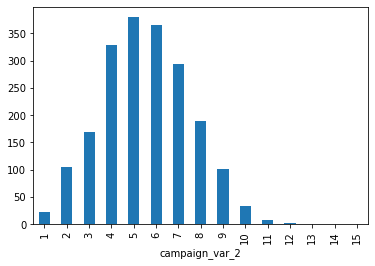

In [10]:
df.groupby(df["campaign_var_2"])['buy'].sum().plot.bar()

In [11]:
dict2={4:1,5:1,6:1,7:1,9:2,2:2,3:2,8:2,1:3,10:3,11:3,12:3,13:3,14:3,15:3}
#4 to 7 given highest rank based on no. of buy
#2,3,9,8 given second rank based on no. of buy
#1,10 to 15 given lowest rank based on no. of buys

In [12]:
df["campaign_var_1"]=df["campaign_var_1"].map(dict1)

In [13]:
df["campaign_var_2"]=df["campaign_var_2"].map(dict2)

In [14]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,2,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,1,3,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,2,2,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,1,1,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,1,1,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,3,3,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,NaN
13180,52342,2022-03-30,3,2,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN
13181,52343,2022-03-30,3,3,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN
13182,52344,2022-03-30,3,3,NaN,NaN,0,0,0,0,0,0,1,0,0,0,1,0,NaN


In [15]:
df['created_at']= pd.to_datetime(df['created_at'])
#converting to date-time format

In [16]:
df['signup_date']= pd.to_datetime(df['signup_date'])
#converting to date-time format

In [17]:
## print the top5 records
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,2,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,1,3,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,2,2,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,1,1,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,1,1,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0


In [18]:
df.buy.value_counts()

0.0    37163
1.0     1998
Name: buy, dtype: int64

## Missing Values

In [19]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
## 2- step print the feature name and the percentage of missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print(len(features_with_na))
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

3
products_purchased 0.5549  % missing values
signup_date 0.4157  % missing values
buy 0.2519  % missing values



### Since they are many missing values, we need to find the relationship between missing values and buy label

Let's plot some diagram for this relationship


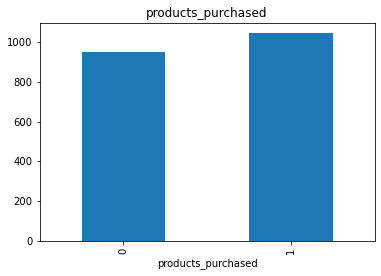

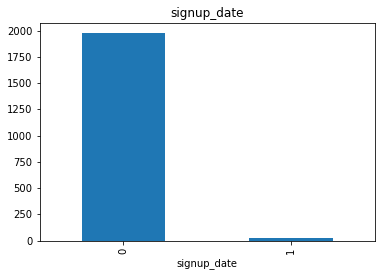

In [20]:
for feature in features_with_na:
    data = df.copy()
    if feature=="buy":#as buy is from test dataset
        continue
    else:
        # let's make a variable that indicates 1 if the observation was missing or zero otherwise
        data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    
     # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['buy'].sum().plot.bar()
    plt.title(feature)
    plt.show()

Here with these plots the relation between the missing values of product purchased and the dependent variable buy is clearly visible.So We need to replace these nan values with something meaningful.

In [21]:
df["products_purchased"]=df["products_purchased"].fillna(-1)
#filling nan values with -1

In [22]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print(len(features_with_na))
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

2
signup_date 0.4157  % missing values
buy 0.2519  % missing values


### Numerical Variables

In [23]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  19


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,2,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0
1,2,2021-01-01,1,3,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0
2,3,2021-01-01,2,2,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0
3,4,2021-01-01,1,1,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,5,2021-01-01,1,1,-1.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0


C:\Users\Hp\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buy', ylabel='count'>

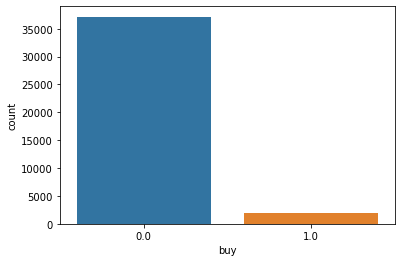

In [24]:
sns.countplot(df["buy"])

In [25]:
df['signup_date'].median()

Timestamp('2021-01-13 00:00:00')

In [26]:
df['signup_date']=df['signup_date'].fillna(df['signup_date'].median())
#filling nan values of signup_date with its mode

In [27]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print(len(features_with_na))
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

1
buy 0.2519  % missing values


In [28]:
## Totaldays=Number of days between two created_at and signup_date
df["Totaldays"]=(df["created_at"]-df['signup_date'])
df["Totaldays"]=df["Totaldays"]/np.timedelta64(1,'D')

In [29]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Totaldays
0,1,2021-01-01,2,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,99.0
1,2,2021-01-01,1,3,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,104.0
2,3,2021-01-01,2,2,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,-222.0
3,4,2021-01-01,1,1,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1185.0
4,5,2021-01-01,1,1,-1.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,3,3,-1.0,2021-01-13,0,0,0,0,0,1,1,0,0,0,0,0,NaN,441.0
13180,52342,2022-03-30,3,2,-1.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN,11.0
13181,52343,2022-03-30,3,3,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN,227.0
13182,52344,2022-03-30,3,3,-1.0,2021-01-13,0,0,0,0,0,0,1,0,0,0,1,0,NaN,441.0


In [30]:
df.isna().sum()
# nan value in buy as these are from test data.

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date                 0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                     13184
Totaldays                   0
dtype: int64

In [31]:
for i in range(len(df["Totaldays"])):   
    if df["Totaldays"].iloc[i]<0:
        df["Totaldays"].iloc[i]=df["Totaldays"].iloc[i]*-1
#converting negative date to positive

C:\Users\Hp\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Totaldays
0,1,2021-01-01,2,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0.0,99.0
1,2,2021-01-01,1,3,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0.0,104.0
2,3,2021-01-01,2,2,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0.0,222.0
3,4,2021-01-01,1,1,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1185.0
4,5,2021-01-01,1,1,-1.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0.0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,3,3,-1.0,2021-01-13,0,0,0,0,0,1,1,0,0,0,0,0,NaN,441.0
13180,52342,2022-03-30,3,2,-1.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,NaN,11.0
13181,52343,2022-03-30,3,3,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,NaN,227.0
13182,52344,2022-03-30,3,3,-1.0,2021-01-13,0,0,0,0,0,0,1,0,0,0,1,0,NaN,441.0


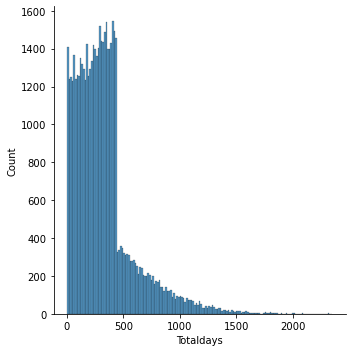

In [33]:
sns.displot(df["Totaldays"])
#Ploting the distribution curve of Totaldays.

In [34]:
import scipy.stats as stats
def diagnostic_plots(df, variable):

    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
# Q-Q Plot to find out the distribution i.e. how much far it is away from gaussian bell curve.  

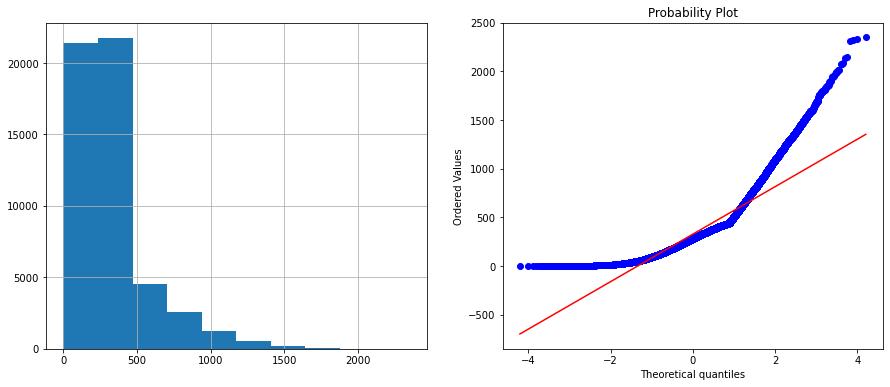

In [35]:
diagnostic_plots(df, 'Totaldays')#Q-Q Plot

Optimal lambda:  0.36402766917666407


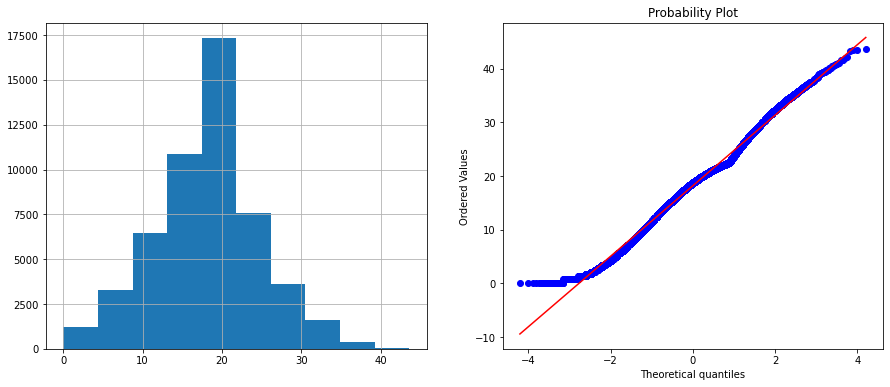

In [36]:
df['Totaldays'], param = stats.boxcox(df.Totaldays+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Totaldays')#best

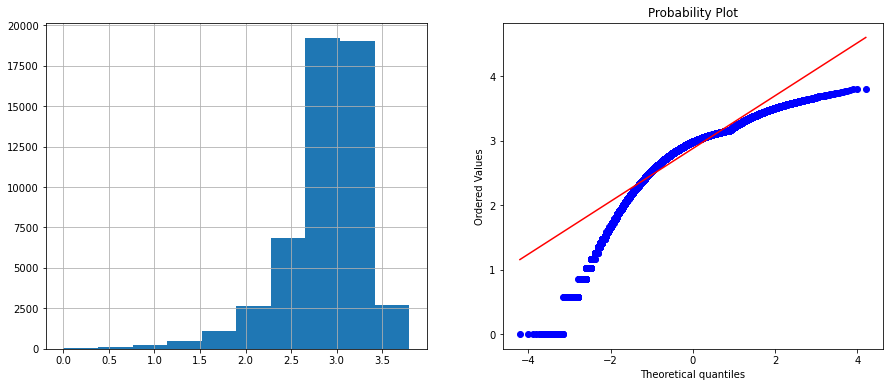

In [37]:
#df['Totaldays']=np.log(df['Totaldays']+1)
#diagnostic_plots(df,'Totaldays')

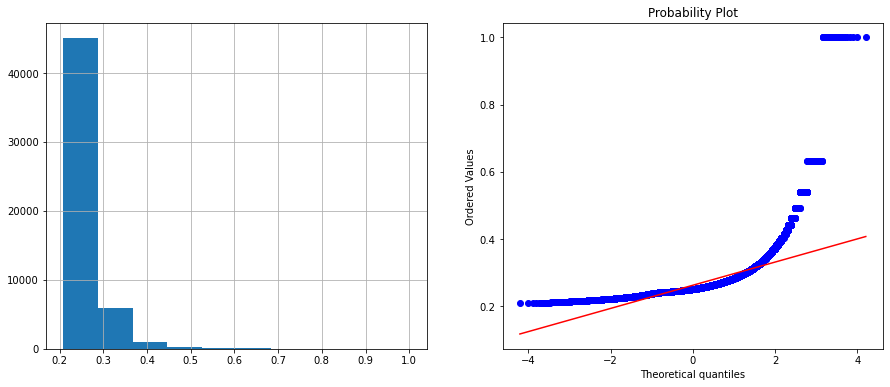

In [38]:
#df['Totaldays']=1/(df['Totaldays']+1)
#diagnostic_plots(df,'Totaldays')

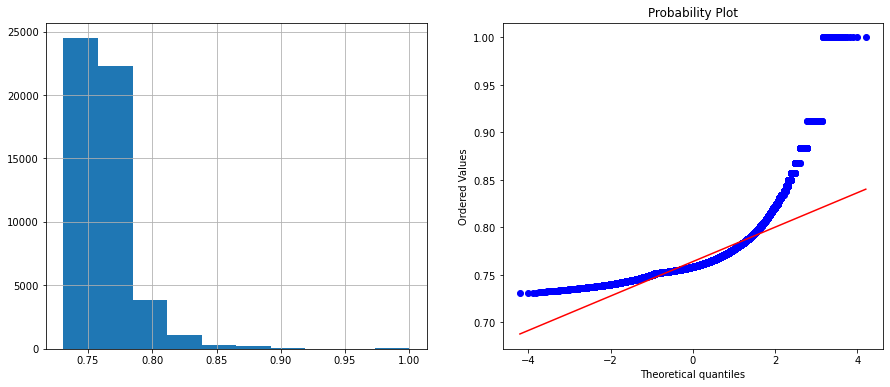

In [39]:
#df['Totaldays']=df['Totaldays']**(1/5)
#diagnostic_plots(df,'Totaldays')

In [40]:
df.drop(labels=["created_at","signup_date"],axis=1,inplace=True)

In [41]:
df

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Totaldays
0,1,2,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0.0,0.775716
1,2,1,3,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0.774842
2,3,2,2,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.762259
3,4,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.738981
4,5,1,1,-1.0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.763357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,3,3,-1.0,0,0,0,0,0,1,1,0,0,0,0,0,NaN,0.752076
13180,52342,3,2,-1.0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,0.824939
13181,52343,3,3,3.0,0,0,1,0,0,0,1,0,0,0,0,0,NaN,0.761912
13182,52344,3,3,-1.0,0,0,0,0,0,0,1,0,0,0,1,0,NaN,0.752076


In [42]:
df_train=df[~df["buy"].isnull()]

In [43]:
df_train

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Totaldays
0,1,2,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0.0,0.775716
1,2,1,3,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0.0,0.774842
2,3,2,2,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.762259
3,4,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.738981
4,5,1,1,-1.0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.763357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,3,3,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0.0,0.735816
39157,39158,1,2,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.755309
39158,39159,2,1,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0.0,0.755309
39159,39160,1,3,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.755309


In [44]:
x=df_train.drop(labels=["id","buy"],axis=1)

In [45]:
y=df_train["buy"]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data= scaler.fit_transform(x)
#converting to a standard scale(Standardization)

In [47]:
dataset = pd.DataFrame(scaled_data, columns=x.columns)
dataset

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,Totaldays
0,0.605568,0.533480,0.921168,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,2.174352,-0.107575,-0.019575,-0.507352,-0.023709,0.497824
1,-0.755231,1.917489,0.921168,1.178167,-0.082227,2.953745,-0.107696,-0.42122,-0.895506,1.565209,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,0.455941
2,0.605568,0.533480,1.523202,1.178167,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-0.146742
3,-0.755231,-0.850529,0.921168,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-1.261729
4,-0.755231,-0.850529,-0.884933,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,-0.459418,-0.107575,-0.019575,1.809936,-0.023709,-0.094173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1.966367,1.917489,0.921168,1.178167,-0.082227,-0.338553,-0.107696,2.35906,0.896100,1.565209,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-1.413338
39157,-0.755231,0.533480,1.523202,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-0.479627
39158,0.605568,-0.850529,0.921168,1.178167,-0.082227,-0.338553,-0.107696,2.35906,-0.895506,1.565209,-0.459418,-0.107575,-0.019575,-0.507352,-0.023709,-0.479627
39159,-0.755231,1.917489,0.921168,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,0.896100,-0.628840,-0.459418,-0.107575,-0.019575,1.809936,-0.023709,-0.479627


In [48]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant

x_incl_cons = sm.add_constant(dataset)
model = sm.OLS(y,x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

# results.params
# results.pvalues

p_value=pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

C:\Users\Hp\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
p_value
#Feature selection based on p-value

,coef,pvalue
const,0.051020,0.000
campaign_var_1,-0.008309,0.000
campaign_var_2,-0.008008,0.000
products_purchased,-0.002749,0.001
user_activity_var_1,0.009021,0.000
user_activity_var_2,0.052312,0.000
user_activity_var_3,0.001242,0.140
user_activity_var_4,0.058858,0.000
user_activity_var_5,0.022105,0.000
user_activity_var_6,0.006461,0.000


In [50]:
p_value["labels"]=p_value.index
p=p_value[p_value["pvalue"]>0.95]

In [51]:
feature_remove=p.index
len(feature_remove)
#All features have significance

0

In [52]:
#Feature selection using Lasso to find out that weather decreasing the feature/complexity have a positive impact on Model performance
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [53]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [54]:
selected_feat = dataset.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((dataset.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 16
selected features: 9


In [55]:
selected_feat

Index(['campaign_var_1', 'campaign_var_2', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_11'],
      dtype='object')

In [56]:
x_final=dataset[selected_feat]
x_final

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_8,user_activity_var_9,user_activity_var_11
0,0.605568,0.533480,-0.785745,-0.082227,-0.107696,-0.42122,2.174352,-0.107575,-0.507352
1,-0.755231,1.917489,1.178167,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
2,0.605568,0.533480,1.178167,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
3,-0.755231,-0.850529,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
4,-0.755231,-0.850529,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936
...,...,...,...,...,...,...,...,...,...
39156,1.966367,1.917489,1.178167,-0.082227,-0.107696,2.35906,-0.459418,-0.107575,-0.507352
39157,-0.755231,0.533480,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
39158,0.605568,-0.850529,1.178167,-0.082227,-0.107696,2.35906,-0.459418,-0.107575,-0.507352
39159,-0.755231,1.917489,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936


In [57]:
#from imblearn.over_sampling import RandomOverSampler

In [58]:
#rdsmple=RandomOverSampler()

In [59]:
#X,Y=rdsmple.fit_resample(x_final,y)

In [60]:
#sns.countplot(Y)

In [61]:
#x_train, x_test, y_train, y_test = train_test_split(x_final , y, test_size = .15 , random_state = 144)

# XGB

In [62]:
import xgboost as xgb

In [63]:
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.04,
 n_estimators=1200,
 max_depth=21,
 min_child_weight=10,
 gamma=0.015,
 subsample=0.75,
 colsample_bytree=0.80,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold=StratifiedKFold(n_splits=15)
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1200,
 max_depth=21,
 min_child_weight=10,
 gamma=0.015,
 subsample=0.75,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
scores=cross_val_score(xgb1,x_final,y,cv=skfold)
print(np.mean(scores))

sk_range = [24]
sk_scores = []
for k in sk_range:
    skfold=StratifiedKFold(n_splits=k)
    xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=1200,
 max_depth=21,
 min_child_weight=10,
 gamma=0.015,
 subsample=0.75,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
    scores = cross_val_score(xgb1,x_final,y,cv=skfold, scoring='f1')
    sk_scores.append(scores.mean())
print(sk_scores)

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits = 10
skfold1 = StratifiedShuffleSplit(n_splits=24, test_size=0.25, random_state=0)

for train_index, test_index in skfold1.split(x_final, y):
    X_train, X_test = x_final.iloc[train_index], x_final.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#Stratified CV better than train test split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(10)
results=cross_val_score(xgb1,x_final,y,cv=kfold_validation)
print(results)
print(np.mean(results))

In [66]:
X_train

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_8,user_activity_var_9,user_activity_var_11
19628,-0.755231,-0.850529,1.178167,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936
36187,-0.755231,-0.850529,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
7056,-0.755231,0.533480,-0.785745,-0.082227,-0.107696,-0.42122,2.174352,-0.107575,-0.507352
32006,-0.755231,0.533480,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
10150,-0.755231,1.917489,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936
...,...,...,...,...,...,...,...,...,...
20073,-0.755231,-0.850529,1.178167,-0.082227,-0.107696,2.35906,-0.459418,-0.107575,1.809936
26204,-0.755231,-0.850529,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936
25085,-0.755231,-0.850529,1.178167,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,-0.507352
26529,-0.755231,-0.850529,-0.785745,-0.082227,-0.107696,-0.42122,-0.459418,-0.107575,1.809936


In [67]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.015, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.04, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=21, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=1200,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [68]:
xgb1.score(X_test,y_test)

0.974057808191196

In [69]:
ypred=xgb1.predict(X_test)

In [70]:
from sklearn import metrics

In [71]:
metrics.classification_report(y_test,ypred)


'              precision    recall  f1-score   support\n\n         0.0       0.97      1.00      0.99      9291\n         1.0       0.95      0.52      0.67       500\n\n    accuracy                           0.97      9791\n   macro avg       0.96      0.76      0.83      9791\nweighted avg       0.97      0.97      0.97      9791\n'

In [72]:
import pickle

In [73]:
file = 'xgb_Final.sav'
pickle.dump(xgb1,open(file,'wb'))

In [74]:
loaded_model = pickle.load(open('xgb_Final.sav','rb'))

In [75]:
#Test data

In [76]:
df_test=df[df["buy"].isnull()]

In [77]:
df_test1=df_test.copy()

In [78]:
df_test1.drop(labels=["id","buy"],axis=1,inplace=True)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data1= scaler.fit_transform(df_test1)
#converting to a standard scale(Standardization)

In [80]:
dataset1 = pd.DataFrame(scaled_data1, columns=df_test1.columns)
dataset1=dataset1[selected_feat]
dataset1

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_8,user_activity_var_9,user_activity_var_11
0,-0.932490,0.120874,1.212970,15.311060,-0.084741,-0.424376,-0.407688,-0.091319,1.613611
1,-0.932490,-1.099346,1.212970,-0.065312,-0.084741,-0.424376,2.449815,-0.091319,-0.547706
2,0.299739,-1.099346,-0.764744,-0.065312,-0.084741,2.348158,-0.407688,-0.091319,-0.547706
3,0.299739,0.120874,-0.764744,-0.065312,-0.084741,2.348158,-0.407688,-0.091319,3.774927
4,-0.932490,-1.099346,1.212970,-0.065312,-0.084741,-0.424376,-0.407688,-0.091319,-0.547706
...,...,...,...,...,...,...,...,...,...
13179,1.531967,1.341095,-0.764744,-0.065312,-0.084741,-0.424376,-0.407688,-0.091319,-0.547706
13180,1.531967,0.120874,1.212970,-0.065312,-0.084741,-0.424376,-0.407688,-0.091319,-0.547706
13181,1.531967,1.341095,-0.764744,-0.065312,-0.084741,-0.424376,-0.407688,-0.091319,-0.547706
13182,1.531967,1.341095,-0.764744,-0.065312,-0.084741,-0.424376,-0.407688,-0.091319,1.613611


In [81]:
#import pickle

In [82]:


#loaded_model = pickle.load(open('kmean.sav','rb'))

In [83]:
#X1['cluster number'] =rf.predict(X1)

In [84]:
#loaded_model1 = pickle.load(open('rf1.sav','rb'))

In [85]:
#(rf.predict(X1)==0).sum()

In [86]:
df_test["buy"]=loaded_model.predict(dataset1)

C:\Users\Hp\AppData\Local\Temp/ipykernel_8940/3126066407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["buy"]=loaded_model.predict(dataset1)


In [87]:
df_test

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,Totaldays
0,39162,1,2,-1.0,1,1,0,0,0,1,0,0,0,0,1,0,1,0.770086
1,39163,1,1,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.748045
2,39164,2,1,-1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.755268
3,39165,2,2,2.0,0,0,0,0,1,1,1,0,0,0,2,0,1,0.748805
4,39166,1,1,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.757816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,3,3,-1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.752076
13180,52342,3,2,-1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.824939
13181,52343,3,3,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.761912
13182,52344,3,3,-1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.752076


In [88]:
submission=df_test[['id',"buy"]]
submission["buy"]=submission["buy"].astype(int)
submission.info()
(submission["buy"]==0).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13184 entries, 0 to 13183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      13184 non-null  int64
 1   buy     13184 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 257.5 KB


C:\Users\Hp\AppData\Local\Temp/ipykernel_8940/4061705170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["buy"]=submission["buy"].astype(int)


12872

In [89]:
submission.to_csv('submission_final_xgb_AV.csv',index=False)
submission

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0
